In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
CSV_FILENAME='financialData.csv'
csv_file = pd.read_csv(CSV_FILENAME)

In [3]:
#Cleaning the data to replace null values with column average and replace negative value with positive value
csv_file['salary'].fillna(csv_file['salary'].mean(), inplace = True)
csv_file['years_res'].fillna(csv_file['years_res'].mean(), inplace = True)
csv_file['debt'].fillna(csv_file['debt'].mean(), inplace = True)
csv_file['age'].fillna(csv_file['age'].mean(), inplace = True)

index = 0
neg_index = 0
for elem in csv_file['years_res']:
    if elem < 0:
        csv_file.loc[index].iat[1] = csv_file.loc[index].iat[1] * -1
    index += 1

In [4]:
# create useful constant for lenght of any column (which are all the same length)
length = len(csv_file['salary'])
# initialize each column as its own array
s = csv_file['salary']
y = csv_file['years_res']
d = csv_file['debt']
a = csv_file['age']

In [5]:
# summary statistics
csv_file.describe()

,salary,years_res,debt,age
count,1505.000000,1505.000000,1505.000000,1505.000000
mean,49.633732,19.327781,24.423671,43.688294
std,23.955359,7.457799,9.784979,13.848169
min,9.506900,0.618710,0.095728,19.000000
25%,28.928000,14.109000,17.988000,30.000000
50%,43.175000,18.723000,24.627000,44.000000
75%,74.182000,24.060000,30.886000,57.000000
max,110.350000,46.611000,55.259000,77.000000


In [6]:
s_avg, s_std = np.mean(s), np.std(s)
y_avg, y_std = np.mean(y), np.std(y)
d_avg, d_std = np.mean(d), np.std(d)
a_avg, a_std = np.mean(a), np.std(a)

In [7]:
drops = 0
for i in range(length):
    if s[i] > (s_avg + (2*s_std)) or s[i] < (s_avg - (2*s_std)):
        csv_file.drop(index=i)
        drops += 1
    if y[i] > (s_avg + (2*s_std)) or y[i] < (s_avg - (2*s_std)):
        csv_file.drop(index=i)
        drops += 1
    if d[i] > (s_avg + (2*s_std)) or d[i] < (s_avg - (2*s_std)):
        csv_file.drop(index=i)
        drops += 1
    if a[i] > (s_avg + (2*s_std)) or a[i] < (s_avg - (2*s_std)):
        csv_file.drop(index=i)
        drops += 1
        
# reinitialize length and column arrays
length = len(csv_file['salary'])

s = csv_file['salary']
y = csv_file['years_res']
d = csv_file['debt']
a = csv_file['age']

#see how many columns were dropped
print(drops)
# redo summary statistics
csv_file.describe()

31


,salary,years_res,debt,age
count,1505.000000,1505.000000,1505.000000,1505.000000
mean,49.633732,19.327781,24.423671,43.688294
std,23.955359,7.457799,9.784979,13.848169
min,9.506900,0.618710,0.095728,19.000000
25%,28.928000,14.109000,17.988000,30.000000
50%,43.175000,18.723000,24.627000,44.000000
75%,74.182000,24.060000,30.886000,57.000000
max,110.350000,46.611000,55.259000,77.000000


Text(0, 0.5, 'years of residence')

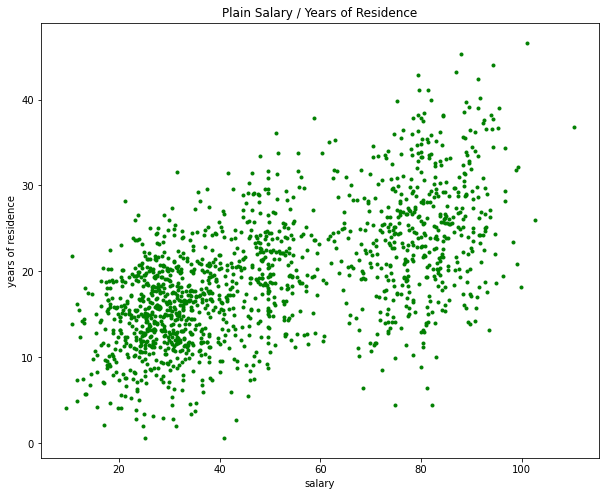

In [8]:
SY = csv_file[['salary', 'years_res']]
fig= plt.figure(figsize=(10,8))
SYplot = plt.scatter(s, y, c='green',marker='.')
plt.title('Plain Salary / Years of Residence')
plt.xlabel('salary')
plt.ylabel('years of residence')

-1.3239566190656005


Text(0, 0.5, 'years of residence')

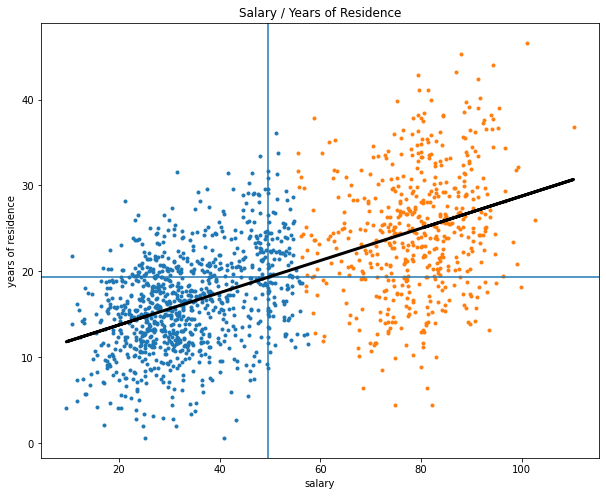

In [9]:
#SYplot clusters
# and line of best fit



fig= plt.figure(figsize=(10,8))
SY_np = SY.to_numpy()
kmeans = KMeans(n_clusters=2).fit(SY_np)
group1 = SY[kmeans.labels_ == 0]
group2 = SY[kmeans.labels_ == 1]
plt.scatter(group1['salary'], group1['years_res'], marker='.')
plt.scatter(group2['salary'], group2['years_res'], marker='.')
#add line of best fit to plot
slope, constant = np.polyfit(s, y, 1)
#add mean lines
plt.axvline(x=np.nanmean(s))
plt.axhline(y=np.nanmean(y))
plt.plot(s, slope*s+constant, color = 'black', linewidth=3)
# add r-squared value
r_squared = r2_score(s,y)
print(r_squared)
plt.title('Salary / Years of Residence')
plt.xlabel('salary')
plt.ylabel('years of residence')

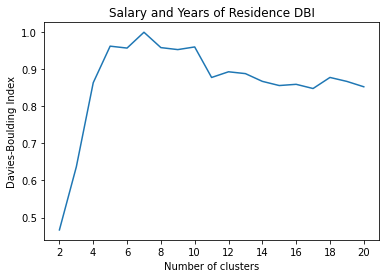

In [10]:
dbi_dict = {}
for i in range(2,21):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(SY)
    db_index = davies_bouldin_score(SY, labels)
    dbi_dict.update({i: db_index})
plt.plot(list(dbi_dict.keys()), list(dbi_dict.values()))
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.title('Salary and Years of Residence DBI')
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

Text(0, 0.5, 'salary')

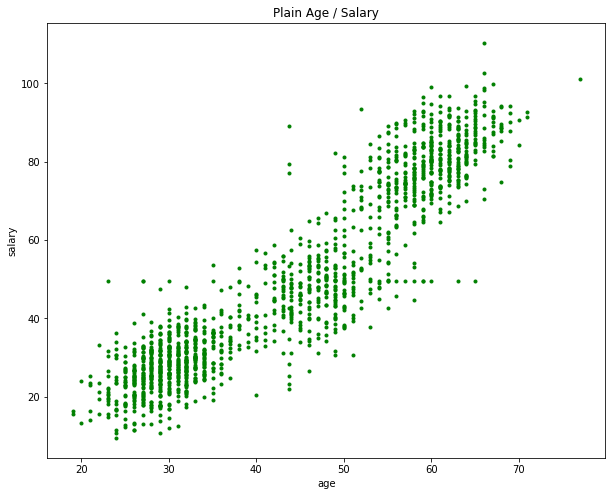

In [11]:
fig= plt.figure(figsize=(10,8))
AS = csv_file[['age', 'salary']]
ASplot = plt.scatter(AS['age'],AS['salary'],c='green',marker='.')
plt.title('Plain Age / Salary')
plt.ylabel('salary')
plt.xlabel('age')
plt.title('Plain Age / Salary')
plt.xlabel('age')
plt.ylabel('salary')

0.03206264490218658


Text(0, 0.5, 'salary')

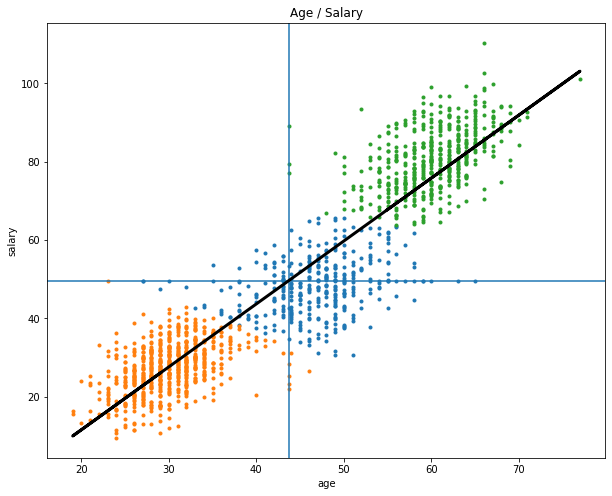

In [12]:
#ASplot clusters and line of best fit

fig= plt.figure(figsize=(10,8))
AS_np = AS.to_numpy()
kmeans = KMeans(n_clusters=3).fit(AS_np)
group1 = AS[kmeans.labels_ == 0]
group2 = AS[kmeans.labels_ == 1]
group3 = AS[kmeans.labels_ == 2]
plt.scatter(group1['age'], group1['salary'], marker='.')
plt.scatter(group2['age'], group2['salary'], marker='.')
plt.scatter(group3['age'], group3['salary'], marker='.')
#add line of best fit to plot
slope, constant = np.polyfit(a, s, 1)
#add mean lines
plt.axvline(x=np.nanmean(a))
plt.axhline(y=np.nanmean(s))
plt.plot(a, slope*a+constant, color = 'black', linewidth=3)
# add r-squared value
r_squared = r2_score(a,s)
print(r_squared)
plt.title('age / salary')
plt.ylabel('salary')
plt.xlabel('age')
plt.title('Age / Salary')
plt.xlabel('age')
plt.ylabel('salary')

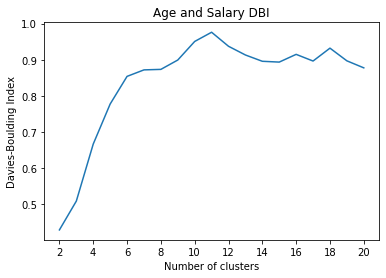

In [13]:
dbi_dict = {}
for i in range(2,21):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(AS)
    db_index = davies_bouldin_score(AS, labels)
    dbi_dict.update({i: db_index})
plt.plot(list(dbi_dict.keys()), list(dbi_dict.values()))
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
plt.title('Age and Salary DBI')
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

Text(0, 0.5, 'debt')

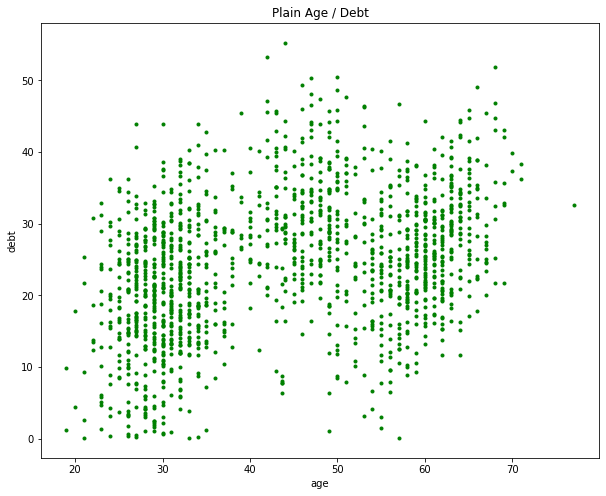

In [14]:
fig= plt.figure(figsize=(10,8))
AD = csv_file[['age', 'debt']]
ADplot = plt.scatter(a, d,c='green',marker='.')
plt.title('Plain Age / Debt')
plt.xlabel('age')
plt.ylabel('debt')

-1.9294528272917129


Text(0, 0.5, 'debt')

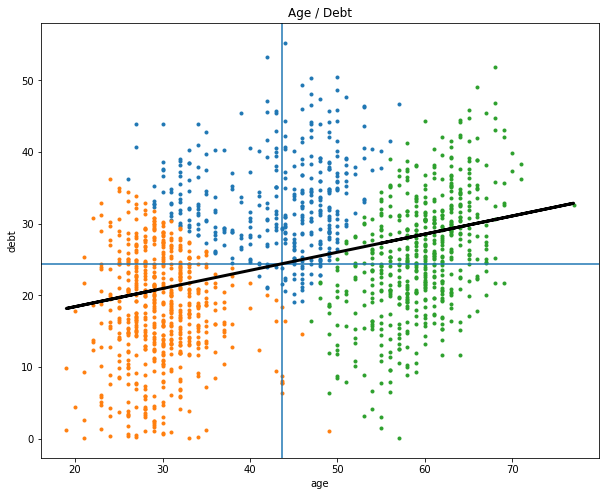

In [15]:
#ADplot clusters and line of best fit
fig= plt.figure(figsize=(10,8))
AD_np = AD.to_numpy()
kmeans = KMeans(n_clusters=3).fit(AD_np)
group1 = AD[kmeans.labels_ == 0]
group2 = AD[kmeans.labels_ == 1]
group3 = AD[kmeans.labels_ == 2]
plt.scatter(group1['age'], group1['debt'], marker='.')
plt.scatter(group2['age'], group2['debt'], marker='.')
plt.scatter(group3['age'], group3['debt'], marker='.')
#add line of best fit to plot
slope, constant = np.polyfit(a, d, 1)
#add mean lines
plt.axvline(x=np.nanmean(a))
plt.axhline(y=np.nanmean(d))
plt.plot(a, slope*a+constant, color = 'black', linewidth=3)

# add r-squared value
r_squared = r2_score(a,d)
print(r_squared)
plt.title('Age / Debt')
plt.xlabel('age')
plt.ylabel('debt')

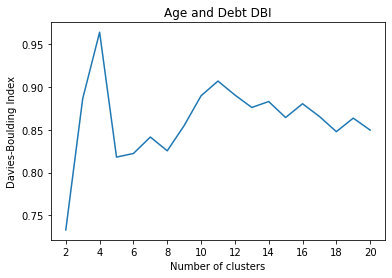

In [16]:
dbi_dict = {}
for i in range(2,21):
    kmeans = KMeans(n_clusters=i)
    labels = kmeans.fit_predict(AD)
    db_index = davies_bouldin_score(AD, labels)
    dbi_dict.update({i: db_index})
plt.plot(list(dbi_dict.keys()), list(dbi_dict.values()))
plt.xticks([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]) 
plt.title('Age and Debt DBI')
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

In [17]:
# based on the three dbi plots dbi plots the DBI scores are as follows
# SY=2, AS=2, AD=2
# however, since the Age / Debt graph and the Age / Salary graph had 3 visually distinct groups, we decided to
# do 3 groups for those 2 graphs

In [18]:
independentVars= csv_file[['salary','years_res','age']]
target= csv_file[['age']]